# Protect Title: Deep learning classification of malignant vs non-malignant melanoma from photographs of the lesion.

*Machine Learning Report by Georgina Wager*

Note: The [Authors’ Github](https://github.com/georginaanna/C7082-Assesment) contains the raw script and the report, the data used can be obtained from [here](https://www.kaggle.com/c/siim-isic-melanoma-classification/data). 


## **Project Outline**

This project is part of the assessment for the module C7082 Techniques in Machine Learning and AI, that is ran at Harper Adams University College by Ed Harris for the MSc Course: Data Science for Global Agriculture, Food and Environment. The project is proposed to use a deep learning algorithm to classify images of lesions as either malignant or non-malignant melanoma. For the analysis, the data was not collected by myself, and instead was obtained from Kaggle, a website that contains many data sets for keen data science learners to enter competitions and practice predictive modelling and analytics (Shaikh, R, not dated).

This project is to use images of lesions and meta data surrounding the circumstances of the image (this is the sex and age of the patient, and the location of the lesion on the body), to carry out a deep learning classification problem to identify if the lesion within the photograph is malignant or a non-malignant melanoma. The prediction is the classification, with an associated probability for each possible class, the scale is 0-1 and it is the probability of the lesion being classified as malignant or non-malignant (benign).

Melanoma is a common skin cancer type, with the World Health Organisation documenting that in 2015 more than 3.1 million people globally were diagnosed with melanoma and for 60,000 people resulted in death (Gálvez and Iglesias, 2020). Melanoma is particularly aggressive as if left undetected it can begin to invade nearby tissues and spread to other parts of the body (e.g., liver, bone, lung, or brain). In addition, data suggests that the number of cases will continue to increase significantly in the coming years (Gálvez and Iglesias, 2020). The first part of melanoma diagnosis is to classify the skin lesion as either benign or malignant, this is a process that first begins by image segmentation. Image segmentation is where the lesion in an image has filters applied to bring more focus to the lesion (the area of interest). These images are then passed to dermatologists who analyse a multiple lesion from the same patient and aim to identify any outliers that could likely be melanoma (Green et al., 2020). The current approach is not a fully digital experience and still relies heavily on dermatologists, therefore this project will aim to use the data set to build a model with the highest accuracy to be able to accurately predict if a lesion is malignant or non-malignant (benign) (Gálvez and Iglesias, 2020). The quicker the ability to detect accurately where a lesion is malignant will aid in providing fast and effective treatment. When detected early, the 5-year survival rate ranges between 89 and 95% for stages I and II with peaks of 99% for stage 0, while it decreases to 25–70% for stage III and only 7–20% for stage IV. In this regard, early diagnosis is particularly important as early-stage melanoma can usually be removed with minor surgery (Gálvez and Iglesias, 2020). 

Machine learning will be utilised fully for this project through initially building a Convolutional Neural Network (CNN) model. CNNs are preferred over traditional neural networks called the multilayer perceptron’s (MLPs) for image classification tasks, largely because they transfer image information into a readable format for a model whilst maintaining spatial information.


**Objectives:**

* To find a deep learning model that classifies an image of a lesion as either malignant or a non-malignant melanoma
* Adapt the model to allow for optimum accuracy


## **Method**

The exact source of the data is: https://www.kaggle.com/c/siim-isic-melanoma-classification/overview, due to the volume of data within the dataset and the limited resources to download and reupload the data  the analysis was carried out in a Kaggle kernel. [Here](https://youtu.be/RU2pIzSftsg) is a video made by the author to demonstrate how data was added to the kernel, in Kaggle, sadly the sound was not working. The kernel in the case of this analysis is a python script that runs in the Kaggle docker. The data was collected by The International Skin Imaging Collaboration (ISIC), as part of a global plan to maximise the efficiency of melanoma diagnosis. The data contained information such as the age of the patient, the patient sex, the location of the lesion, the patient ID and whether the lesion was malignent or non-malignent, each image has a row within the data. 

The images that have been used for this analysis are jpeg images and these are in a separate location to the meta data. The train data set contains 33,126 observations and the test set contains 10,982 observations. All images used were jpeg files in red, green and blue (RGB) format and a variety of different sizes, the final size chosen was dependent on accuracy results of the model. 

To be able to test the accuracy of the model the training data set was further diced, removing 20% of the data and classifying this as the validation set. A training data set is required to fir the model, and a validation set can provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration. Whereas the test data can provide a final unbiased evaluation of a final model fit on the training dataset (James et al., 2013).

Firstly the data was added to this notebook, this was done via the "+ Add data" on the right hand column of the kernal notebook. Competition data was selected from the top bar, then "SIIM-ISIC Melanoma Classification" was searched for in the search box. When the option came up the button " Add" was pressed to add it to the kernal, for step by step instructions please refer to the [authors video](https://youtu.be/RU2pIzSftsg). The first step was to ensure that the work done in this model was reproducible using the random.seed () function. 

In [ ]:
## Reproducibility
## Random seed given
import random ## import the random library
random.seed(10) ## Setting the seed to get the same answer no matter how many times and who runs the model

Next models were downloaded that would carry out a variety of functions this included downloading the numpy library to enable linear functions, the pandas library for data processing, the glob library for producing arrays of images, the cv2 library for adding labels to specific images, the matplotlib.pyplot library for producing plots. A key package utilised was the “keras.preprocessing.image” that utilised the library’s ImageDataGenerator, load_img, img_to_array, array_to_img which all aid in image pre-processing. The ImageDataGenerator is of specific importance as this converts the RGB format that is a numeric figure between 0 and 255 for each red, green and blue component. These numbers must be changed to a grid of pixels and turned into tensors for the CNN to read and understand the image and the image components, these tensor values are also rescaled to a number between 0 and 1. 

In [ ]:
## Downloading specific libraries
import numpy as np ## Library that enables linear functions 
import pandas as pd ##  # Enables data processing
import glob ## returns an array of filenames that match a pattern
import cv2 ## helps add labels to image classifications
import matplotlib.pyplot as plt ## library for producing figures
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img ## importing image processing packages from 
## keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ## Import libraries for model building 

Next the images were read and the location of images was added to this data, as this was in a seperate location. The meta data also contained the class of the image, for exsample identified it as malignent or non malignent.  

In [ ]:
## Read the train csv file
train_dir='/kaggle/input/siim-isic-melanoma-classification/jpeg/train/' ## assigning a name to the location of the train images
train=pd.read_csv('/kaggle/input/siim-isic-melanoma-classification/train.csv') ## assigning a name to the location of the CSV file

## Read the test csv file
test_dir='/kaggle/input/siim-isic-melanoma-classification/jpeg/test/' ## assigning a name to the location of the test images
test=pd.read_csv('/kaggle/input/siim-isic-melanoma-classification/test.csv') ## assigning a name to the location of the CSV file 

In [ ]:
train['path'] = train_dir + train.image_name + ".jpg" ## adding the location of the image to the row for the train data set
train.head() ## showing the first 5 lines of the train data set, note the "path" coloumn 

test['path'] = test_dir + test.image_name + ".jpg"  ## adding the location of the image to the row for the test data set
test.head()  ## showing the first 5 lines of the test data set, note the "path" coloumn 

The next step was to understand the distribution of the classes within the data set. This told us the 32,542 images were classed as "0" hence non malignent and only 584 were malignent, this is a very uneven distribution of classes. 

In [ ]:
## Class Distribution
train.target.value_counts() ## Count the number of images that were classified as malignent or non malignent

Based on the uneven distribution of the classes within the data set the train data set was set to only include 1000 of class 0 and 584 of class 1.  

In [ ]:
df_0=train[train['target']==0].sample(1000) ## produce a data frame using 1000 images from the train data set where the target equals zero
df_1=train[train['target']==1] ## produce a data frame using all the images from the test data set where the target equals 584
train=pd.concat([df_0,df_1]) ## create a new dataset using the smaller training data set
train=train.reset_index() ## making sure the new "train" data set is being used for the model

To check that the new training set was made up of 1584 samples the train.shape function was used. 

In [ ]:
train.shape ## how many observations and variables are in the training set being used for the model 

In [ ]:
train.head() ## First 5 rows of the new train set with the path information

The final model chosen will be shown below but first here is an overview of the other models. All model were ran using GPUs. 

[Model 1](https://www.kaggle.com/georginawager/cnn-model-1):- Model one was a basic CNN with no image argumentation, this model had a validation loss of 2.4 and a validation accuracy of 73%, these figures are often a result of overfitting. This model had image sizes at 150 x 150 and epoch at 30. 

[Model 2](https://www.kaggle.com/georginawager/cnn-model-2):- In an attempt to reduce overfitting because of the small training data set image augumentation was utilised. The image size has increased to 200 x 200 and the epoch was increased to 75. This model resulted in an improvement in the validation loss to 0.4993 and the validation accuracy increased to 77%.

Next the model that had the best validation accuracy in comparison to the previous three models is explained below, the difference between this model and the other was the image size decreased to 120 x 120 but the epochs remaind the same as model to at 75.

In [ ]:
# we will resize the given images to 120 x 120 size images for faster processing
IMG_DIM = (120, 120) ## changing the image dimensions 

In [ ]:
from sklearn.model_selection import train_test_split ## importing the train test split function 
X_train, X_val, y_train, y_val = train_test_split(train, train.target, test_size=0.2, random_state=42) ## taking 20% of the training data set 

The pathway for the images for both the train and validation set were established, and the images in these files were changed to arrays with labels for each image. Arrays are essential for any machine learning problem as they can be used to represent images. 

In [ ]:
train_files = X_train.path ## Image path for the training data set
val_files = X_val.path ## Image path for the validation data set

train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] ## load images using load_img function from keras 
## preprocessing using the target_size function 
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_files] ## using the img_to_array will tranform the loaded image to an array

train_imgs = np.array(train_imgs) ## converting the list of arrays to array for the training dataset 
train_labels = y_train

validation_imgs = np.array(validation_imgs) ## converting the list of arrays to array for the validation dataset 
val_labels = y_val


print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape) ## asking for the number of observations in the data set after image argumentations 

Next the images were scaled and converted into an RGB format, this is a numeric figure between 0 and 255 for each red, green and blue component. These numbers must be changed to a grid of pixels and turned into tensors for the CNN to read and understand the image components, these tensor values are also rescaled to a number between 0 and 1. 

In [ ]:
## Scaling the images

train_imgs_scaled = train_imgs.astype('float32') ## scale each image with pixel values between (0, 255) 
validation_imgs_scaled  = validation_imgs.astype('float32') ## do the same for the validation images

# divide the pixels by 255 to scale the pixels between 0 and 1
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape) ## print the shape of the images

array_to_img(train_imgs[0]) ## using the array_to_img function will convert the given array to image

In [ ]:
# setup basic configuration
batch_size = 30 ## indicating the total number of images passed to the model per iteration
num_classes = 2 
epochs = 75 ## establishing the training time 
input_shape = (120, 120, 3)

from keras.models import Sequential ## importing the sequential library
from keras import optimizers ## importing optimizers

Image augumentation was used in the chosen model as the first model used had no image augumentation and could not generalise well which resulted in overfitting. Image augmentation is a process of altering a single image and turning it into multiple images for a bigger training set. Image augmentation is a process of altering orginal images and applying transformations to them to produce a new image that is based on the existing image. These images were then fed into the model (Chollet, 2018). 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=70,
                                   width_shift_range=0.3, height_shift_range=0.3, shear_range=0.3, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


The ImageDataGenerator from the "Keras" libray was utilised to transform the raw images and produce new images that we can add to the model. The images were zoomed randomly by a factor of 0.3 using the zoom_range parameter, rotated by 70 degrees using the rotation_range parameter and translation of the images randomly horizontally or vertically by a 0.3 factor of the image’s width or height using the width_shift_range and the height_shift_range parameters. The images have undergone random shear-based transformations through the shear_range parameter and randomly flipping half the image from a horizonatal perspective using the horizontal_flip parameter. Next the fill_mode() function was used to provide pixel values for new images from the nearest pixel values, this is an improtant step when creating new images. 

In [ ]:
## Viewing a random image and see how a transformated image looks
img_id = 1

img_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)

img = [next(img_generator) for i in range(0,5)]

fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in img])
l = [ax[i].imshow(img[i][0][0]) for i in range(0,5)]

Each new image has been assigned a label so it can be identified by the model. The new images are only in the training data set and not in the validation data set,this is because we want to test the model on the orginal data (validation set) without any image augmentation.

The train_generator function was utilised for training the batch size for the training set, which has been set at 30 and the val_generator function utilised for training the batch size for the validation set which has been set at 20. Next the sequential function was used for the basic structure of the model. Before defining the basic convent, which is made up of layers of Conv2D and Maxpooling to understand the images such as the edges, these layers pull through information from the feature map into the final layers (Chollet, 2018). There are multiple Conv2 and Maxpooling layers for this model and this is to reduce the size of the feature map prior to reaching the flatten layer. A flatten layer is used for converting the data into a 1-dimensional array for inputting it into the next layer. We flatten the output of the convolutional layers to create a single long feature vector, this is connected to the final classification model.                                                                                                       Next two dense components were used with 512 dense layers all layers are fully connected, meaning all the neurons in a layer are connected to those in the next layer. A drop out layer has been used for regulation. A final dense layer has been used establishing one layer here to encode the probability of one class or another (Chollet, 2018).

Next the model is compiled using the model.compile function, here the loss function, optimiser and metric is defined. The loss function is defined first, for this model it is binary classification therefore binary_crossentropy is used to define this function (Chollet, 2018).  The optimiser utilised here is the RmsProp that utilizes the magnitude of recent gradients to normalize the gradients. A moving average is utilised over the root mean squared (RMS). An optimiser is also defined as this provides the stochastic gradient descent this has been set at 0.0001. Finally the metric that the model needs to be assessed by is “accuracy” as this will allow us to determine how effective the model is, this metric is given for both the training and validation set. 

The fit_generator() function from the keras package has been used to train the model by defining the steps_per_epoch at 32 and the standard epoch at 75. Epoch is the number of passes of the entire training dataset into the model.


In [ ]:
## Random seed given
import random ## import the random library
random.seed(10) ## Setting the seed to get the same answer no matter how many times and who runs the model

from keras.models import Sequential ## importing the sequential library
from keras import optimizers ## importing optimizers

train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30) ## defining the batch size
val_generator = val_datagen.flow(validation_imgs, val_labels, batch_size=20) ## defining the batch size

input_shape = input_shape

model = Sequential()  ## creating the model structure with one input tensor and one output tensor.
## add Conv2D layer,filter size,kernel size,activation and padding are the parameters used
## to create a feature map for each filter used
## feature maps created here are then taken through the activation function(relu), which decides whether a certain feature is present 
## at a given point in the image.

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
## Pooling layer used here will select the largest values on the feature maps and use these as inputs to subsequent layers
model.add(MaxPooling2D(pool_size=(2, 2)))

## another set of Convolutional & Max Pooling layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
## The Dense part with 512 layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
## sigmoid function here will help perform binary classification
model.add(Dense(1, activation='sigmoid')) ## establishing one layer here to encode the probability of one class or another

model.compile(loss='binary_crossentropy', ## defining the loss function
              optimizer=optimizers.RMSprop(lr=1e-4), ## defining the optimiser 
              metrics=['accuracy']) ## defining the measure in this case it is the accuracy
              
history = model.fit_generator(train_generator, steps_per_epoch=32, epochs=75,
                              validation_data=val_generator, validation_steps=12, 
                              verbose=1) ## fitting the model 

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) ## determing the size of the plot 
t = f.suptitle('CNN Model 3- with image argumentation', fontsize=12) ## plot title
f.subplots_adjust(top=0.85, wspace=0.3) ## padding

## Creating a graph for the training data accuracy and loss results
epoch_list = list(range(1,76)) ## number of epochs on the x axis
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') ## adding labels 
## and plotting the data 
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') ## adding labels 
## and plotting the data 
ax1.set_xticks(np.arange(0, 76, 5)) 
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

## same again for the validation data 
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 76, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## **Results**

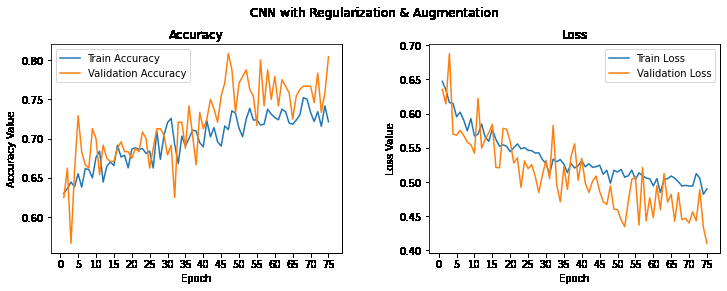

The model has a training accuracy of 72% and a validation accuracy of 80%, where as loss went from 0.49 in the training set to 0.41 in the validation set. 

## **Discussion**

The model produced, successfully classifies an image as malignant or non-malignant, with an accuracy of 80% and a loss of 0.41. However, there is both room and need for improvement, especially when classifying images as malignant or non-malignant. The incorrect classification of a lesion could have devastating impacts on the patient who has received the classification and the general health care system. The effects could result in a cancerous lesion developing into a state that can increase the chance of fatalities, in turn leaving patients impacted both mentally and physically. For health care systems it could result in people having a lack of trust in the health care system.  Therefore, it is important that a model is produced that can be extremely accurate and reliable for both the patient and the health care system. A further point to consider when weighing up the use of this model for medical imaging is the accuracy of dermatologists detecting lesions as malignant or non-malignant, as that accuracy could be considerably more or less than a basic CNN model. 

It is also important to mention that a basic CNN model was chosen for this analysis, further improvements could have been made by using transfer learning where a previously trained network convolutional base could have been used for the new data, with a specific classifier layer that is specific to the lesion classification problem. Pretrained CNNs are more complicated than basic CNNs but this does allow for higher accuracy percentages. Some examples that could have been utilised are; VGG19, ResNet50 and Xception. Further to this a Region Based Convolutional Neural Network could have been used to focus more on the object within the image – in this case this would be the lesion. 

Future areas of improvement would be to try and get an equal data set of both malignant and non- malignant images. The current model tried to achieve this through data argumentation techniques, however more images would possibly provide a better training data set to then train the model and improve accuracy. A further option to tackle the uneven distribution of the two classes throughout the data set would have been to use a K-cross validation as an alternative to splitting the training data set into a train and validation data set. 

The quality of the images was relatively good but some of the images had hairs that overlapped the lesion, this could have impacted the accuracy of the model. The model also did not take into consideration patient information, as one patient could have very similar lesions, instead the model saw the lesions as all independent from each other if this were included in the model this could have influenced the model accuracy. 

Overall, the model successfully classifies the image, but the accuracy could be improved through different image augmentation techniques, using k fold cross validation and the use of a pretrain convent. However, the results are still better compared to if using an MLP. In addition to pretrained CNNs a Region Based Convolutional Neural Network (R-CNN) could have been utilised as this focuses more on the object within an image- the lesion. However due to the limited experience of the author in coding in python this was not explored. To go a step further in model improvement more images of malignant lesions would allow a more even distribution of the classes. 


## **References**

Chollet, F. 2018. *Deep Learning with python*. Shelter Island: Manning.

Gálvez, A. and Iglesias, A. 2020. *Memetic improved cuckoo search algorithm for automatic B-spline border approximation of cutaneous melanoma from macroscopic medical images. *Advanced Engineering Informatics, 43, p.101005.

James, G., Witten, D., Hastie, T. and Tibshirani, R. 2013. *An introduction to statistical learning *(Vol. 112). New York: springer.

Goodfellow, I., Bengio, Y., Courville, A. 2016. *Deep learning* (Vol. 1, No. 2). Cambridge: MIT press.

Green, A.C., Pandeya, N., Morton, S., Simonidis, J. and Whiteman, D.C. 2020. *Early detection of melanoma in specialised primary care practice in Australia*. Cancer Epidemiology, 70, p.101872.

Shaikh, R. not dated. *To Kaggle Or Not*. [Online]. KDNuggets. Available from: https://www.kdnuggets.com/2018/05/to-kaggle-or-not.html [Accessed 17 January 2021]. 
[](http://)